In [ ]:
# Random Forest Alg for MA4635 Final

In [ ]:
# https://www.geeksforgeeks.org/random-forest-regression-in-python/ helped

In [ ]:
2+2

4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
import numpy as np
from scipy.stats import ks_2samp

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# #Reading in Data

# Diamonds_Train = pd.read_csv('/content/drive/MyDrive/DS4635_Data/diamonds_train.csv')
# Diamonds_Test = pd.read_csv('/content/drive/MyDrive/DS4635_Data/diamonds_test.csv')
# Diamonds_Val = pd.read_csv('/content/drive/MyDrive/DS4635_Data/diamonds_val.csv')

In [ ]:
# Diamonds_Train.drop('Unnamed: 0', axis=1, inplace=True)
# Diamonds_Test.drop('Unnamed: 0', axis=1, inplace=True)
# Diamonds_Val.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
def get_data(split: str):
    df = pd.read_csv(f'diamonds_{split}.csv')
    df = df.rename(columns = {'Unnamed: 0': 'Index'})
    # print(df.dtypes)
    x = df.drop(['Index', 'price'], axis = 1) # index col not needed
    # print(x.describe())
    y = df['price']
    # print(y.describe())
    # x_arr = x.to_numpy()
    # y_arr = y.to_numpy()
    # # print(x_arr[1])
    # print(y_arr[0])
    return x, y

In [ ]:
def ohe(df, col: str):
  visited = []
  for val in df[col]:
    if val not in visited:
      visited.append(val)
  for val in visited:
    if f'{val}_{col}' not in df.columns:
      df[f'{val}_{col}'] = df[col].apply(lambda x: 1 if x == val else 0)

  df = df.drop(col, axis = 1)
  return df

In [ ]:
def feature_engineering(split):
  x_train, y_train = get_data('train')
  x_train = ohe(x_train, 'color')
  x_train = ohe(x_train, 'cut')
  x_train = ohe(x_train, 'clarity')
  ks= {}
  if split != "train":


    x_split, y_split = get_data(split)
    x_split = ohe(x_split, 'color')
    x_split = ohe(x_split, 'cut')
    x_split = ohe(x_split, 'clarity')
    train = pd.concat([x_train, y_train], axis = 1)
    val = pd.concat([x_split, y_split], axis = 1)
    for col in train.columns:
      stat, p = ks_2samp(train[col], val[col])
      ks[col] = f'statistic: {stat}', f'p-value: {p}'
  else:
    x_split, y_split = x_train, y_train

  for k, v in ks.items():
    _, p = v
    p = float(p.split(': ')[1])
    if p < 0.05:
      print('different distributions')
      raise Exception

  print('p looks good')
  scaler = StandardScaler()
  scaler.fit(y_train.to_numpy().reshape(-1, 1))
  y_split = scaler.transform(y_split.to_numpy().reshape(-1, 1))
  n_feats = x_split.shape[1]
  # print(n_feats)
  x_split = x_split.to_numpy()
  return x_split, y_split, n_feats, ks

# change param to use train as a basis for fit


In [ ]:
x_train, y_train, _, _= feature_engineering('train')
x_val, y_val, _, _ = feature_engineering('val')
x_test, y_test, _, _ = feature_engineering('test')

p looks good
p looks good
p looks good


In [ ]:
x_train

array([[ 0.58, 60.4 , 57.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.05, 63.5 , 57.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.71, 58.9 , 62.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.5 , 62.4 , 53.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.32, 61.9 , 55.  , ...,  0.  ,  0.  ,  0.  ],
       [ 1.54, 60.9 , 56.4 , ...,  0.  ,  0.  ,  0.  ]])

In [ ]:
y_train

array([[-0.42195242],
       [ 0.1942313 ],
       [-0.43806838],
       ...,
       [-0.64228783],
       [-0.84600366],
       [ 1.39285593]])

In [ ]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42, oob_score=True)

regressor.fit(x_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [ ]:
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = regressor.predict(x_val)

mse = mean_squared_error(y_val, predictions)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9801632070716702
Mean Squared Error: 0.24341347161624163
R-squared: 0.7675692197657968


(430, 1)


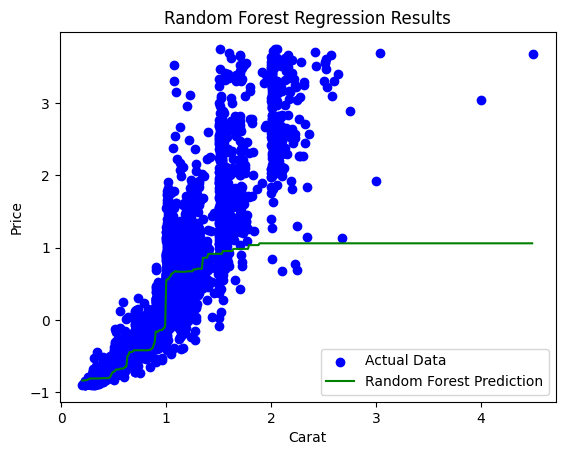

In [ ]:
# Generate X_grid with 9 features
X_grid = np.arange(min(x_val[:, 0]), max(x_val[:, 0]), 0.01)  # Only the first feature
X_grid = X_grid.reshape(-1, 1)
print(X_grid.shape)
X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 25))))  # Pad with zeros

# Plot results
plt.scatter(x_val[:, 0], y_val, color='blue', label="Actual Data")  # Plot first feature vs target
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")
plt.title("Random Forest Regression Results")
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
# try with more trees
regressor2 = RandomForestRegressor(n_estimators=500, random_state=42, oob_score=True)

regressor2.fit(x_train, y_train)

oob_score = regressor2.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions2 = regressor2.predict(x_val)

mse = mean_squared_error(y_val, predictions2)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions2)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9807155309137568
Mean Squared Error: 0.24329188387061576
R-squared: 0.7676853215345079


In [ ]:
# try with more trees
regressor3 = RandomForestRegressor(n_estimators=750, random_state=42, oob_score=True)

regressor3.fit(x_train, y_train)

oob_score = regressor3.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions3 = regressor3.predict(x_val)

mse = mean_squared_error(y_val, predictions3)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions3)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9807392085774284
Mean Squared Error: 0.24320165460840235
R-squared: 0.7677714796985444


In [ ]:
# try with more trees
regressor4 = RandomForestRegressor(n_estimators=1000, random_state=42, oob_score=True)

regressor4.fit(x_train, y_train)

oob_score = regressor4.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions4 = regressor4.predict(x_val)

mse = mean_squared_error(y_val, predictions4)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions4)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9807604959563876
Mean Squared Error: 0.24314734416663622
R-squared: 0.7678233396809471


In [ ]:
# try with max_features='sqrt
regressor5 = RandomForestRegressor(n_estimators=1000, random_state=42, max_features='sqrt', oob_score=True)

regressor5.fit(x_train, y_train)

oob_score = regressor5.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions5 = regressor5.predict(x_val)

mse = mean_squared_error(y_val, predictions5)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions5)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9794668802623755
Mean Squared Error: 0.1999545990410164
R-squared: 0.8090672502309456


In [ ]:
# try with max_features='log2'
regressor6 = RandomForestRegressor(n_estimators=1000, random_state=42, max_features='log2', oob_score=True)

regressor6.fit(x_train, y_train)

oob_score = regressor6.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions6 = regressor6.predict(x_val)

mse = mean_squared_error(y_val, predictions6)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions6)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9784978368658329
Mean Squared Error: 0.18979668822362875
R-squared: 0.8187668413059916


In [ ]:
# more samples per leaf
regressor7 = RandomForestRegressor(n_estimators=1000, random_state=42, max_features='log2', oob_score=True, min_samples_leaf=10)

regressor7.fit(x_train, y_train)

oob_score = regressor7.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions7 = regressor7.predict(x_val)

mse = mean_squared_error(y_val, predictions7)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions7)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9671387655613425
Mean Squared Error: 0.16770209317060972
R-squared: 0.8398645395271829


In [ ]:
# more samples per leaf
regressor8 = RandomForestRegressor(n_estimators=1000, random_state=42, max_features='log2', oob_score=True, min_samples_leaf=50)

regressor8.fit(x_train, y_train)

oob_score = regressor8.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions8 = regressor8.predict(x_val)

mse = mean_squared_error(y_val, predictions8)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions8)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9464579018116039
Mean Squared Error: 0.1554982733298355
R-squared: 0.8515177292565533


In [ ]:
# more samples per leaf
regressor8 = RandomForestRegressor(n_estimators=1000, random_state=42, max_features='log2', oob_score=True, min_samples_leaf=250)

regressor8.fit(x_train, y_train)

oob_score = regressor8.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions8 = regressor8.predict(x_val)

mse = mean_squared_error(y_val, predictions8)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions8)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9059894602078986
Mean Squared Error: 0.15335925166886452
R-squared: 0.8535602393538629


In [ ]:
# more samples per leaf
regressor9 = RandomForestRegressor(n_estimators=1000, random_state=42, max_features='log2', oob_score=True, min_samples_leaf=500)

regressor9.fit(x_train, y_train)

oob_score = regressor9.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions9 = regressor9.predict(x_val)

mse = mean_squared_error(y_val, predictions9)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions9)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.8828012148572574
Mean Squared Error: 0.15090737547030722
R-squared: 0.8559014881519854


In [ ]:
# more samples per leaf
regressor10 = RandomForestRegressor(n_estimators=1000, random_state=42, oob_score=True, min_samples_leaf=500)

regressor10.fit(x_train, y_train)

oob_score = regressor10.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions10 = regressor10.predict(x_val)

mse = mean_squared_error(y_val, predictions10)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_val, predictions10)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9012763945985296
Mean Squared Error: 0.16664668760359042
R-squared: 0.8408723257346471


In [ ]:
# model 6 with testing data
predictions6 = regressor6.predict(x_test)

mse = mean_squared_error(y_test, predictions6)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions6)
print(f'R-squared: {r2}')

Mean Squared Error: 0.22922495960695885
R-squared: 0.7804669767964405


In [ ]:
# model 4 with testing data
predictions4 = regressor4.predict(x_test)

mse = mean_squared_error(y_test, predictions4)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions4)
print(f'R-squared: {r2}')

Mean Squared Error: 0.2979941196525814
R-squared: 0.7146054683731378


In [ ]:
# model 9 with testing data
predictions9 = regressor9.predict(x_test)

mse = mean_squared_error(y_test, predictions9)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, predictions9)
print(f'R-squared: {r2}')

Mean Squared Error: 0.14949001009499058
R-squared: 0.856830626511374


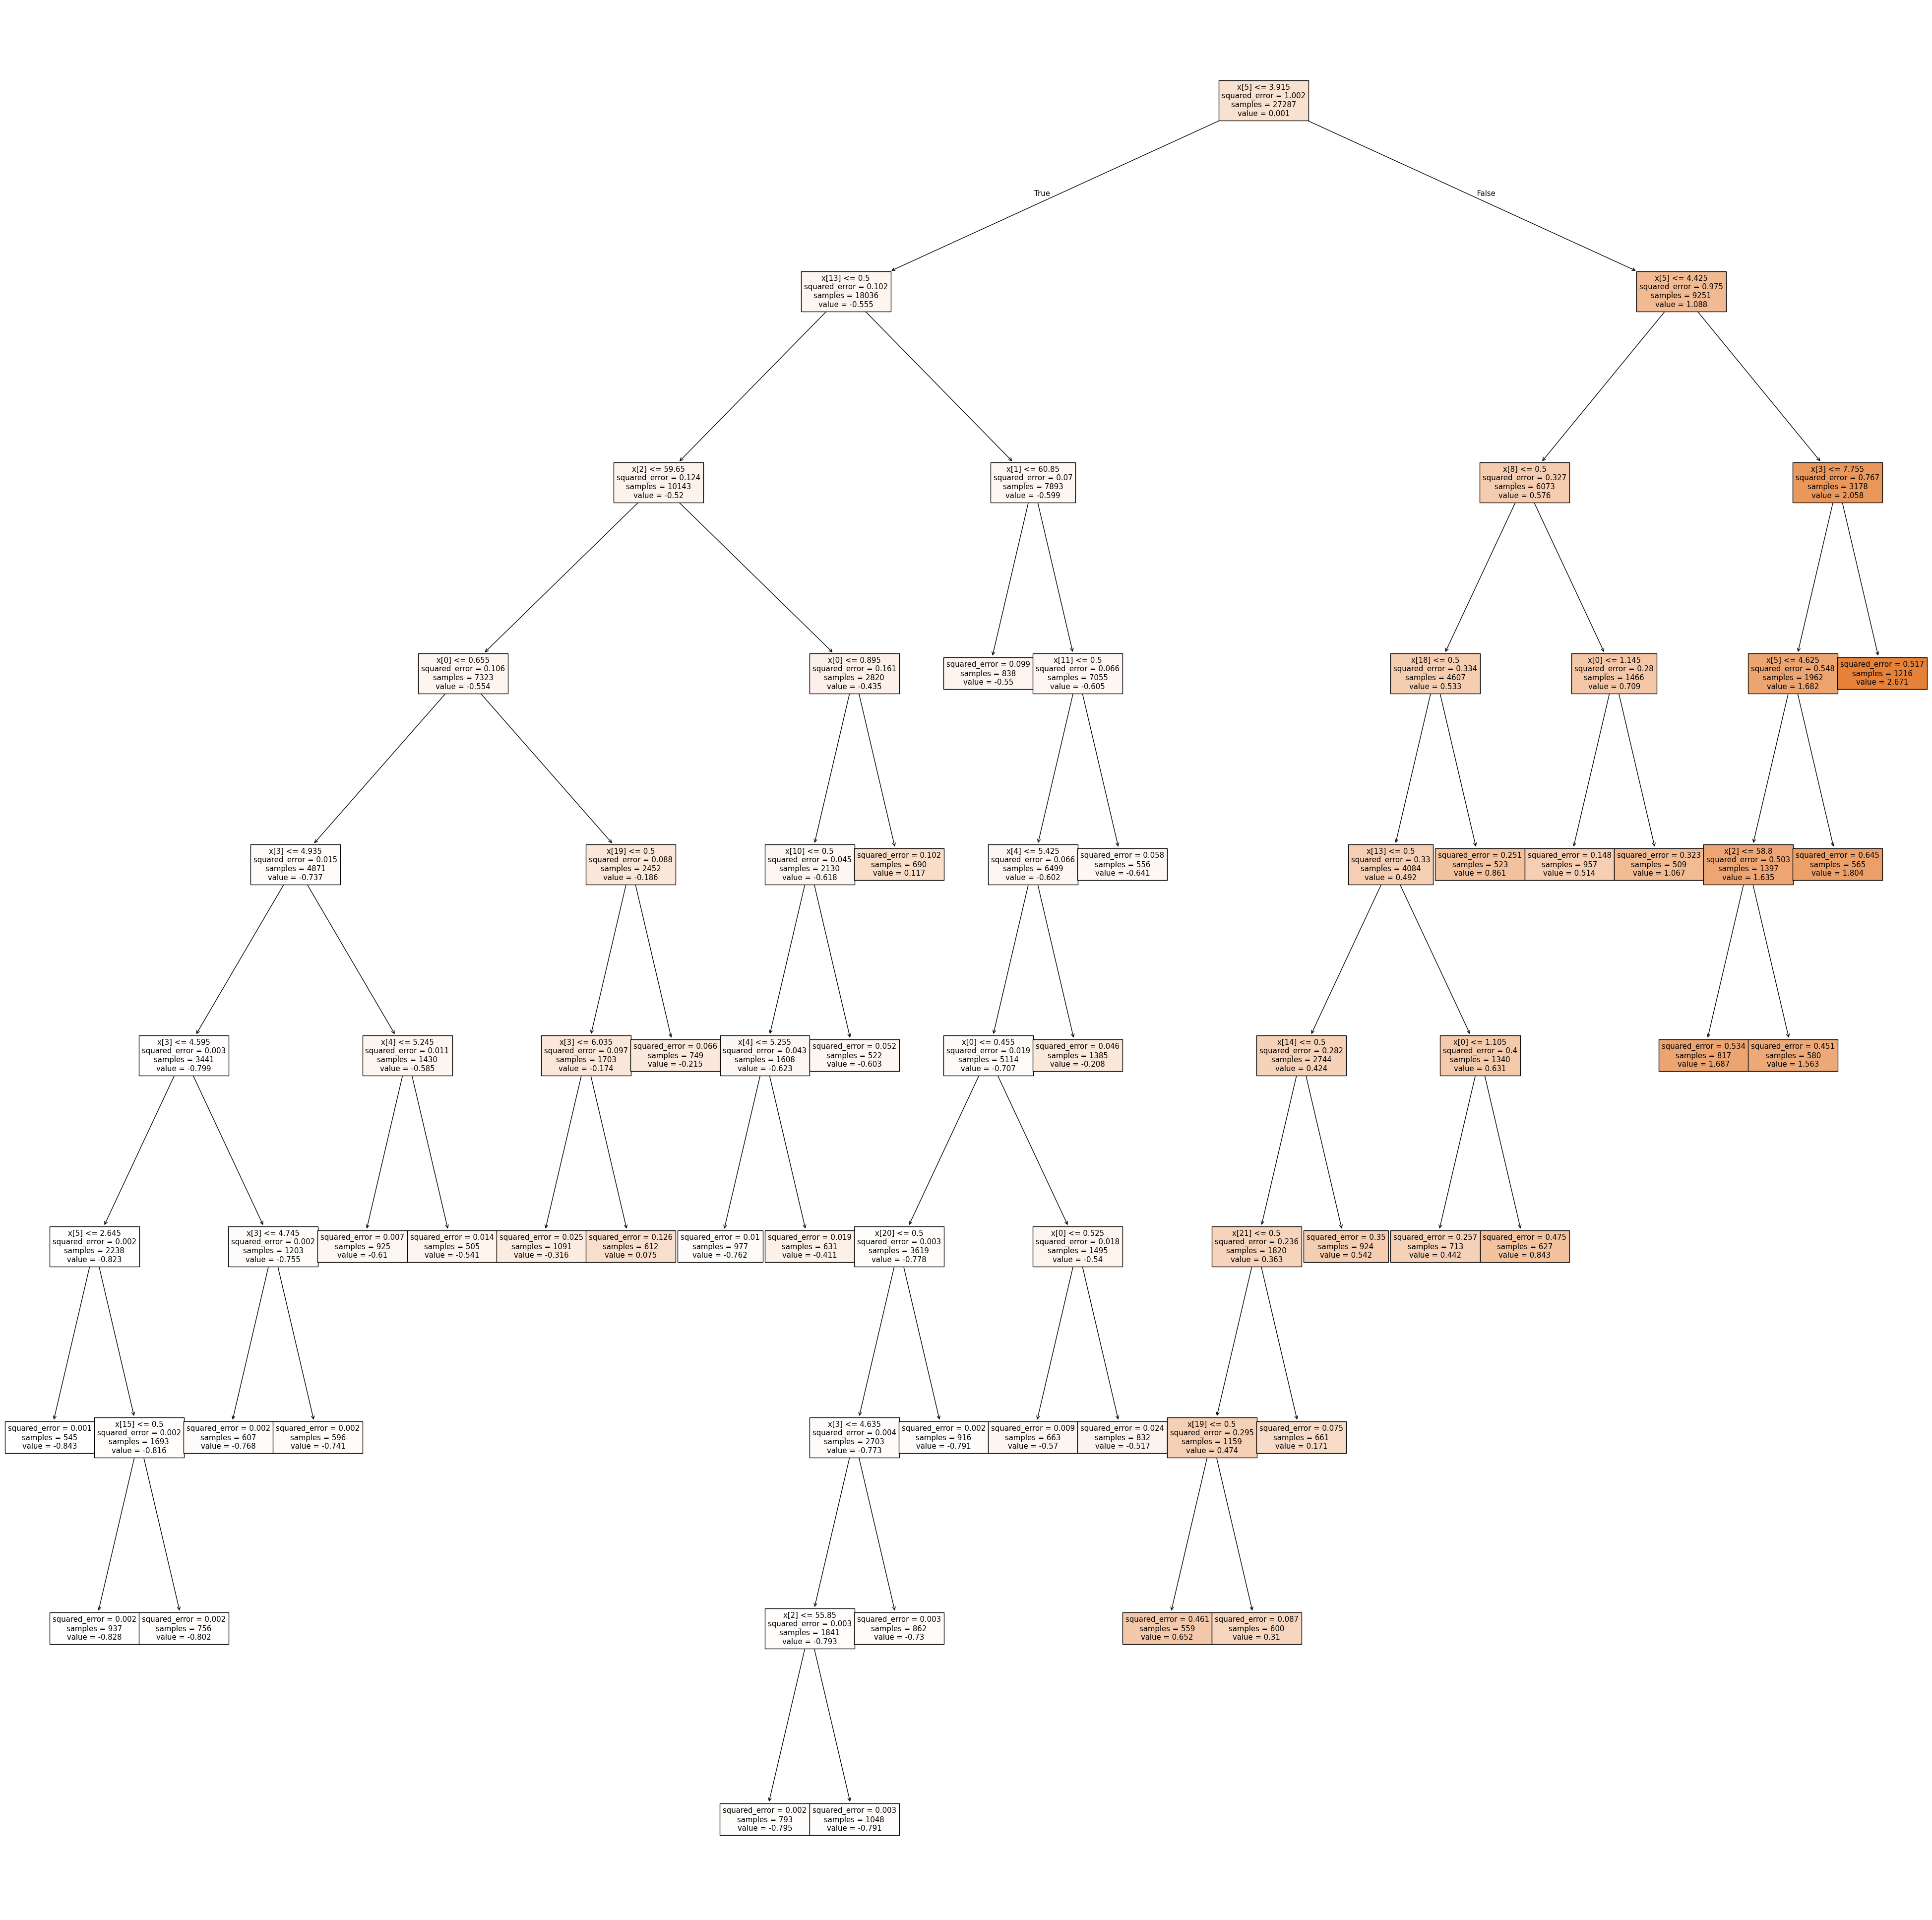

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(50, 50))  # Adjust figure size for better visualization
plot_tree(regressor9.estimators_[0], feature_names=x_train.dtype.names, filled=True)  # plot_tree requires feature names
plt.show()